# USE
Script used to process the diffusion data for the PEGDA hydrogel

# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from PIL import Image 
import pydicom as dicom



from scipy.fft import fft, fftfreq
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import auc
from tkinter.filedialog import askdirectory
import tkinter as tk

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

import os
import csv
import pandas as pd

import pydicom as dicom

import imageio

## Extract Masks

In [2]:
patM = 'C:/IBECPostDocDrive/2023_07_25_ScaffoldDiffusionMRIProcessing'

MS = np.asarray(Image.open(patM+'/MaskScaffold_Hydro2.png'))/255
ME = np.asarray(Image.open(patM+'/MaskEppen_Hydro2.png'))/255
MB = np.asarray(Image.open(patM+'/MaskBack_Hydro2.png'))/255


In [3]:
MA = np.asarray(Image.open(patM+'/MaskAll_Hydro2.png'))/255


In [5]:
pat = 'C:/IBECPostDocDrive/2023_07_25_ScaffoldDiffusionMRIProcessing/Diffusion_hydrogel_eppendor'
fol = '263'

ds = imageio.v2.imread(pat+'/'+fol+'/pdata/1/dicom/Eppendorf_Eppendorf_Difussion_hydrog_E'+fol+'_P1_Im1.dcm')



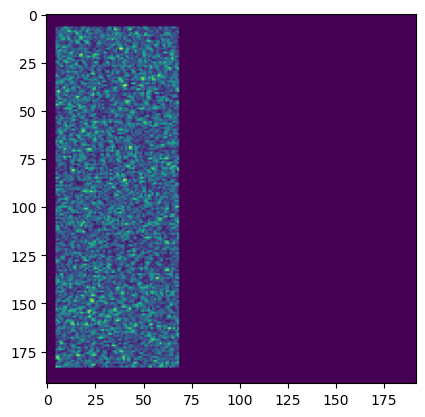

In [6]:

k = 0
fol = str(list(range(263, 331))[k])
ds = imageio.v2.imread(pat+'/'+fol+'/pdata/1/dicom/Eppendorf_Eppendorf_Difussion_hydrog_E'+fol+'_P1_Im1.dcm')


plt.imshow(ds*MB)


# [(ds*MB)[i,j] for i in range(0,np.shape(MB)[0]) for j in range(0,np.shape(MB)[1]) if (ds*MB)[i,j] != 0]

# plt.hist(np.reshape(ds*MB, (1, 192*192)))

(array([2.6384e+04, 2.1810e+03, 2.8700e+03, 2.3350e+03, 1.6040e+03,
        9.0200e+02, 3.7600e+02, 1.4900e+02, 4.7000e+01, 1.6000e+01]),
 array([  0.        ,  70.76712646, 141.53425293, 212.30137939,
        283.06850586, 353.83563232, 424.60275879, 495.36988525,
        566.13701172, 636.90413818, 707.67126465]),
 <BarContainer object of 10 artists>)

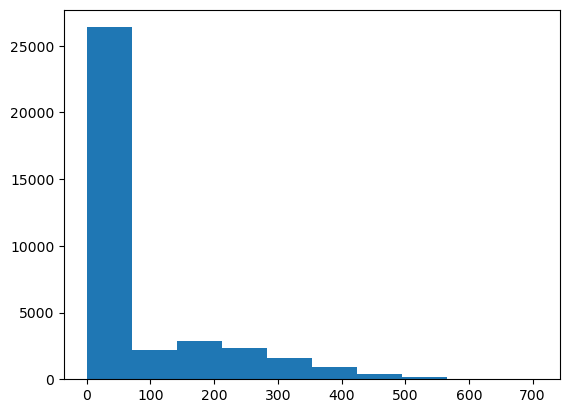

In [7]:
# np.shape(ds*MB)
mm=np.reshape(ds*MB, (1, 192*192))

plt.hist(mm[0])

### Extract Data

In [13]:
ds=np.empty(331-263+1, dtype=object)
for x, i in enumerate(range(263,331+1)):
    ds[x] = imageio.v2.imread(pat+'/'+str(i)+'/'+'/pdata/1/dicom/Eppendorf_Eppendorf_Difussion_hydrog_E'+str(i)+'_P1_Im1.dcm')


In [14]:
exper = '11'

pat = 'C:/IBECPostDocDrive/2023_07_25_ScaffoldDiffusionMRIProcessing/Diffusion_hydrogel_eppendor'
# fol = '12'
ScaffDat = dict()
EppenDat = dict()
BackgDat = dict()
AllDat = dict()

if os.path.exists(pat+'/tmpDat') == False:
    os.mkdir(pat+'/tmpDat')


if os.path.exists(pat+'/tmpDat/ScaffDat'+exper+'.csv'):
    df2 = pd.read_csv(pat+'/tmpDat/ScaffDat'+exper+'.csv')
    ScaffDat=df2.to_dict(orient='list')

    df2 = pd.read_csv(pat+'/tmpDat/EppenDat'+exper+'.csv')
    EppenDat=df2.to_dict(orient='list')

    df2 = pd.read_csv(pat+'/tmpDat/BackgDat'+exper+'.csv')
    BackgDat=df2.to_dict(orient='list')

    df2 = pd.read_csv(pat+'/tmpDat/AllDat'+exper+'.csv')
    AllDat=df2.to_dict(orient='list')

else:
    for k in range(0,69):
        fol = str(list(range(263, 331+1))[k])
        ds = imageio.v2.imread(pat+'/'+fol+'/pdata/1/dicom/Eppendorf_Eppendorf_Difussion_hydrog_E'+fol+'_P1_Im1.dcm')

        ScaffDat[str(k)] = [(ds*MS)[i,j] for i in range(0,np.shape(MS)[0]) for j in range(0,np.shape(MS)[1]) if (ds*MS)[i,j] != 0]
        EppenDat[str(k)] = [(ds*ME)[i,j] for i in range(0,np.shape(ME)[0]) for j in range(0,np.shape(ME)[1]) if (ds*ME)[i,j] != 0]
        BackgDat[str(k)] = [(ds*MB)[i,j] for i in range(0,np.shape(MB)[0]) for j in range(0,np.shape(MB)[1]) if (ds*MB)[i,j] != 0]
        AllDat[str(k)] = [(ds*MA)[i,j] for i in range(0,np.shape(MA)[0]) for j in range(0,np.shape(MA)[1]) if (ds*MA)[i,j] != 0]

    df = pd.DataFrame.from_dict(ScaffDat)
    df.to_csv(pat+'/tmpDat/ScaffDat'+exper+'.csv', index=False)

    
    df = pd.DataFrame.from_dict(EppenDat)
    df.to_csv(pat+'/tmpDat/EppenDat'+exper+'.csv', index=False)

    
    df = pd.DataFrame.from_dict(BackgDat)
    df.to_csv(pat+'/tmpDat/BackgDat'+exper+'.csv', index=False)

    
    df = pd.DataFrame.from_dict(AllDat)
    df.to_csv(pat+'/tmpDat/AllDat'+exper+'.csv', index=False)

In [15]:
AllImg = dict()
for k in range(0,69):
    fol = str(list(range(263, 331+1))[k])
    ds = imageio.v2.imread(pat+'/'+fol+'/pdata/1/dicom/Eppendorf_Eppendorf_Difussion_hydrog_E'+fol+'_P1_Im1.dcm')

    AllImg[str(k)] = [(ds)[i,j] for i in range(0,np.shape(MA)[0]) for j in range(0,np.shape(MA)[1]) if (ds)[i,j] != 0]

### Plot Data

In [17]:
SDM = [np.mean(ScaffDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]
SDS = [np.std(ScaffDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]

In [18]:
EDM = [np.mean(EppenDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]
EDS = [np.std(EppenDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]

In [19]:
FDM = [np.mean(AllDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]
FDS = [np.std(AllDat[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]

In [20]:
FDMb = [np.mean(AllImg[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]
FDSb = [np.std(AllImg[str(k)] - np.mean(BackgDat[str(k)]))  for k in range(0, 69)]

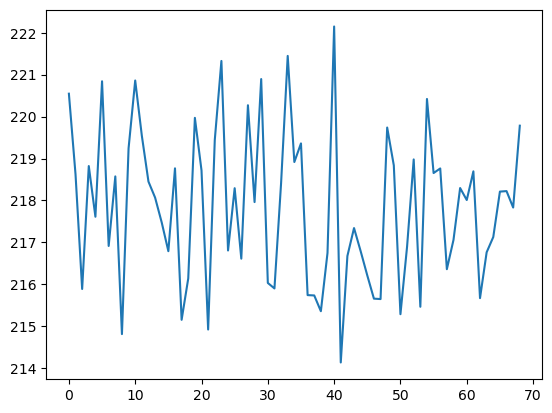

In [22]:
plt.plot([np.mean(BackgDat[str(k)])  for k in range(69)])

In [24]:
tp = list(range(0,69))


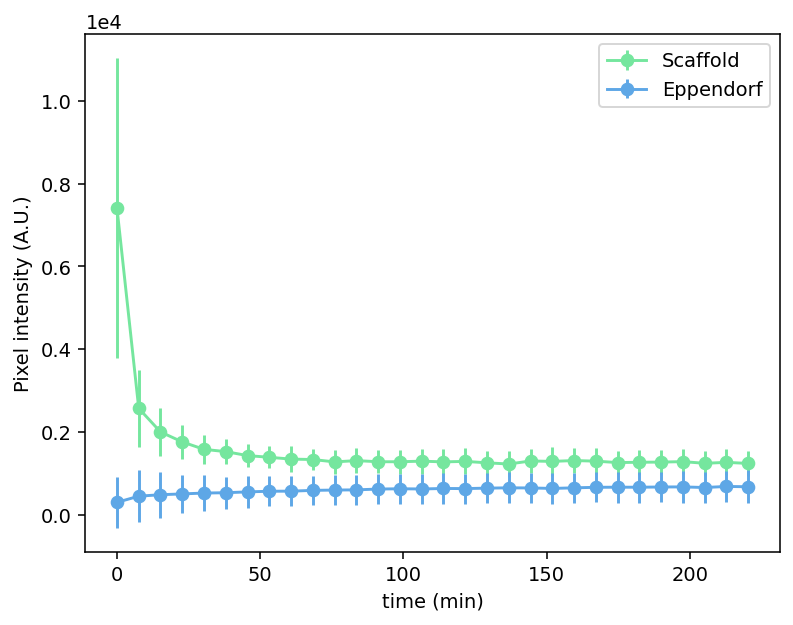

In [38]:
k = 0

plt.figure(dpi=140)

plt.errorbar([tp[i]*3.8 for i in range(0, len(tp))][0:60:2], SDM[0:60:2], yerr=SDS[0:60:2], fmt='-o', label='Scaffold', color='#75E69E')
plt.errorbar([tp[i]*3.8 for i in range(0, len(tp))][0:60:2], EDM[0:60:2], yerr=EDS[0:60:2], fmt='-o', label='Eppendorf', color='#5EA7E6')

plt.xlabel('time (min)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.yscale('log')

# plt.savefig(r'C:\IBECPostDocDrive\2023_07_25_ScaffoldDiffusionMRIProcessing/DatErrHydrogel.svg')

plt.show()

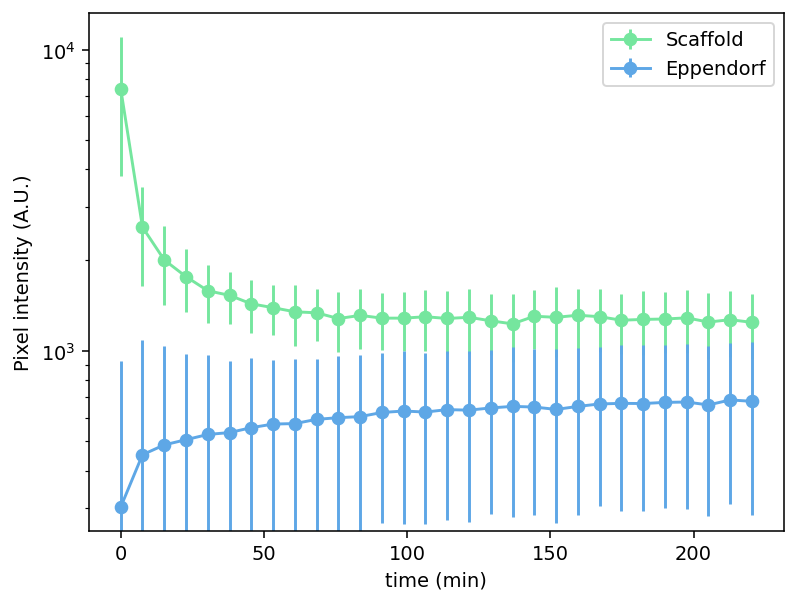

In [37]:
k = 0

plt.figure(dpi=140)

plt.errorbar([tp[i]*3.8 for i in range(0, len(tp))][0:60:2], SDM[0:60:2], yerr=SDS[0:60:2], fmt='-o', label='Scaffold', color='#75E69E')
plt.errorbar([tp[i]*3.8 for i in range(0, len(tp))][0:60:2], EDM[0:60:2], yerr=EDS[0:60:2], fmt='-o', label='Eppendorf', color='#5EA7E6')

plt.xlabel('time (min)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yscale('log')

plt.savefig(r'C:\IBECPostDocDrive\2023_07_25_ScaffoldDiffusionMRIProcessing/DatErrHydrogel_Log.svg')

plt.show()

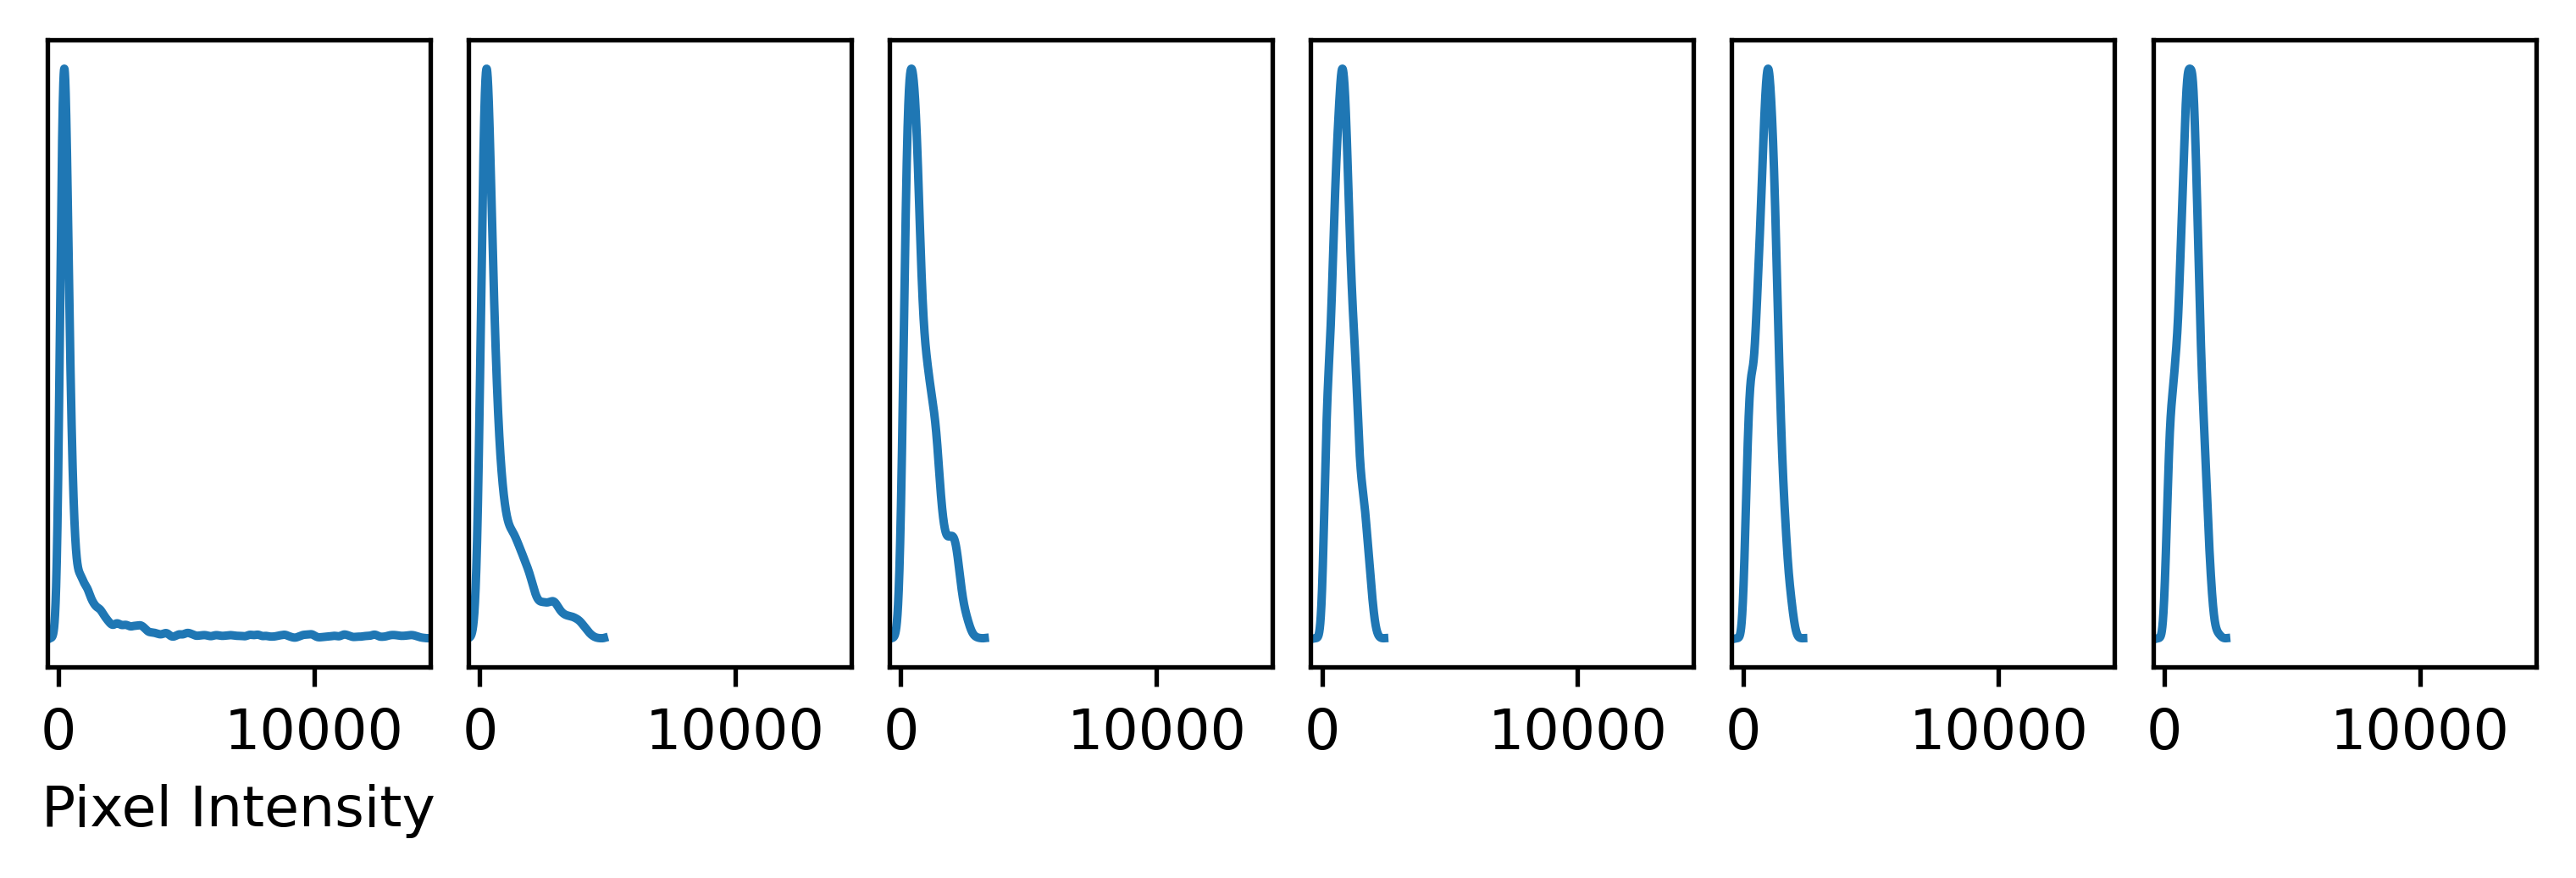

In [41]:

fig, axs = plt.subplots(1, 6, dpi = 480, figsize = (6.8,2))
fig.subplots_adjust(left=0, wspace=0.1, hspace=0.1)

ax1 = axs[0]
kde1 = sm.nonparametric.KDEUnivariate(AllDat[str(0)])
kde1.fit()
# ax1.set_xticks([]) 
ax1.set_yticks([])
# ax1.set_ylim(np.min([AllDat[str(0)], AllDat[str(1)], AllDat[str(3)], AllDat[str(7)], AllDat[str(15)], AllDat[str(24)]]), 
#              np.max([AllDat[str(0)], AllDat[str(1)], AllDat[str(3)], AllDat[str(7)], AllDat[str(15)], AllDat[str(24)]]))



ax2 = axs[1]
kde2 = sm.nonparametric.KDEUnivariate(AllDat[str(2)])
kde2.fit()
# ax2.set_xticks([]) 
ax2.set_yticks([])

ax3 = axs[2]
kde3 = sm.nonparametric.KDEUnivariate(AllDat[str(6)])
kde3.fit()
# ax3.set_xticks([]) 
ax3.set_yticks([])

ax4 = axs[3]
kde4 = sm.nonparametric.KDEUnivariate(AllDat[str(14)])
kde4.fit()
# ax4.set_xticks([]) 
ax4.set_yticks([])

ax5 = axs[4]
kde5 = sm.nonparametric.KDEUnivariate(AllDat[str(30)])
kde5.fit()
# ax5.set_xticks([]) 
ax5.set_yticks([])

ax6 = axs[5]
kde6 = sm.nonparametric.KDEUnivariate(AllDat[str(48)])
kde6.fit()
# ax6.set_xticks([]) 
ax6.set_yticks([])




ax1.plot(kde1.support, kde1.density)
ax2.plot(kde2.support, kde2.density)
ax3.plot(kde3.support, kde3.density)
ax4.plot(kde4.support, kde4.density)
ax5.plot(kde5.support, kde5.density)
ax6.plot(kde6.support, kde6.density)

ax1.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))
ax2.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))
ax3.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))
ax4.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))
ax5.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))
ax6.set_xlim(np.min([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]), np.max([kde1.support,kde2.support,kde3.support,kde4.support,kde5.support,kde6.support]))

ax1.set_xlabel('Pixel Intensity')

plt.show()


# fig.savefig(r'C:\IBECPostDocDrive\2023_07_25_ScaffoldDiffusionMRIProcessing/KDE_5a.png', bbox_inches='tight', pad_inches=0)

fig.savefig(r'C:\IBECPostDocDrive\2023_07_25_ScaffoldDiffusionMRIProcessing/KDE_Hydroa_Final.svg', bbox_inches='tight', pad_inches=0)

